In [1]:
!unzip -uq "/content/drive/My Drive/gestures.zip" -d "/content/"

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split

# Uploading Images

The dataset contains images for {palm, l , fist, fist_moved, thumb, index, ok, palm_moved, c, down} representing {0,1,2,3,4,5,6,7,8,9} 

In [6]:

imgpath=[]
X=[]
Y=[]
for dirname, _, filenames in os.walk('/content/gestures'):
  for filename in filenames:
    path=os.path.join(dirname,filename)
    img=cv2.imread(path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray=cv2.resize(gray,(120,120))
    X.append(gray)
    category=path.split('/')[5]
    Y.append(int(category.partition('_')[0][1]))


In [ ]:
# label_classes

array(['down', 'index', 'fist', 'thumb', 'fist_moved', 'c', 'palm', 'l',
       'palm_moved', 'ok'], dtype=object)

In [7]:
x_temp=X.copy()
y_temp=Y.copy()

# Shuffle Data 

In [8]:
shuffled_indices=np.arange(len(X))
np.random.shuffle(shuffled_indices)

In [9]:
X_final=np.array(X)[shuffled_indices]
Y_final=np.array(Y)[shuffled_indices]

In [ ]:
# labels=np.array(labels)[shuffled_indices]

# Display Data

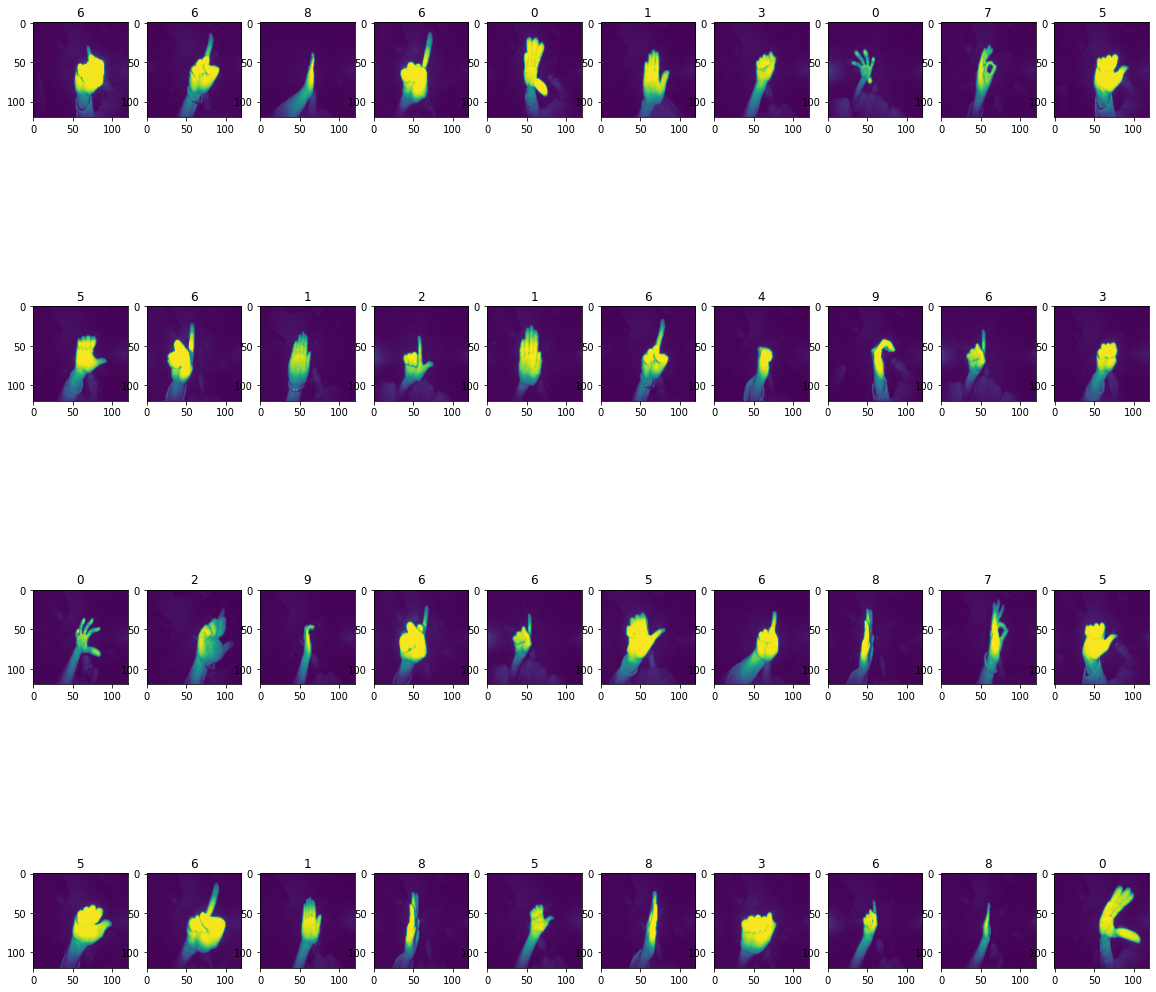

In [11]:
n_rows=4
n_cols=10
plt.figure(figsize=(20,20))
for row in range(n_rows):
  for col in range(n_cols):
    index=n_cols*row+col
    plt.subplot(n_rows,n_cols,index+1)
    plt.imshow(X_final[index])
    plt.title(Y_final[index])
plt.show()

In [ ]:
X_final=X_final.reshape(20000,120,120,1)

# Split Data
Train and test

In [ ]:
X_train,X_test=X_final[4000:] /255.,X_final[:4000] /255.

In [ ]:
Y_train,Y_test=Y_final[4000:],Y_final[:4000]

In [ ]:
X_test.shape

(4000, 120, 120, 1)

# Model Creation

In [ ]:
  model2=tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu',input_shape=(120,120,1)),
                             tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(10,activation='softmax')
  ])
  optimizer=tf.keras.optimizers.SGD(learning_rate=3e-3)
  model2.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

# Training 

In [ ]:
model2.fit(X_train,Y_train,epochs=10,
              validation_data=(X_test,Y_test))

Epoch 1/10
500/500 [==============================] - 15s 31ms/step - loss: 1.5119 - accuracy: 0.5113 - val_loss: 0.5518 - val_accuracy: 0.8535
Epoch 2/10
500/500 [==============================] - 15s 30ms/step - loss: 0.5195 - accuracy: 0.8410 - val_loss: 0.1813 - val_accuracy: 0.9635
Epoch 3/10
500/500 [==============================] - 15s 31ms/step - loss: 0.2731 - accuracy: 0.9185 - val_loss: 0.0779 - val_accuracy: 0.9825
Epoch 4/10
500/500 [==============================] - 15s 31ms/step - loss: 0.1831 - accuracy: 0.9454 - val_loss: 0.0496 - val_accuracy: 0.9862
Epoch 5/10
500/500 [==============================] - 15s 31ms/step - loss: 0.1349 - accuracy: 0.9590 - val_loss: 0.0354 - val_accuracy: 0.9898
Epoch 6/10
500/500 [==============================] - 16s 31ms/step - loss: 0.1121 - accuracy: 0.9669 - val_loss: 0.0231 - val_accuracy: 0.9933
Epoch 7/10
500/500 [==============================] - 16s 31ms/step - loss: 0.0948 - accuracy: 0.9709 - val_loss: 0.0192 - val_accuracy:

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 116, 116, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 58, 58, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 215296)            0         
_________________________________________________________________
dropout (Dropout)            (None, 215296)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               27558016  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [ ]:
model2.evaluate(X_test,Y_test)

125/125 [==============================] - 1s 10ms/step - loss: 0.0104 - accuracy: 0.9977


[0.010401147417724133, 0.9977499842643738]

In [ ]:
# round(model2.predict(X_test[:3]),2)

# Predictions on test data

In [ ]:
predictions=model2.predict(X_test)

In [ ]:
np.argmax(predictions[1]),Y_test[1],labels[1]

(5, 5, 'thumb')

In [ ]:
X_test.shape

(4000, 120, 120, 1)

In [ ]:
xcopy_test=X_test.copy()
xcopy_test=xcopy_test.reshape(4000,120,120)

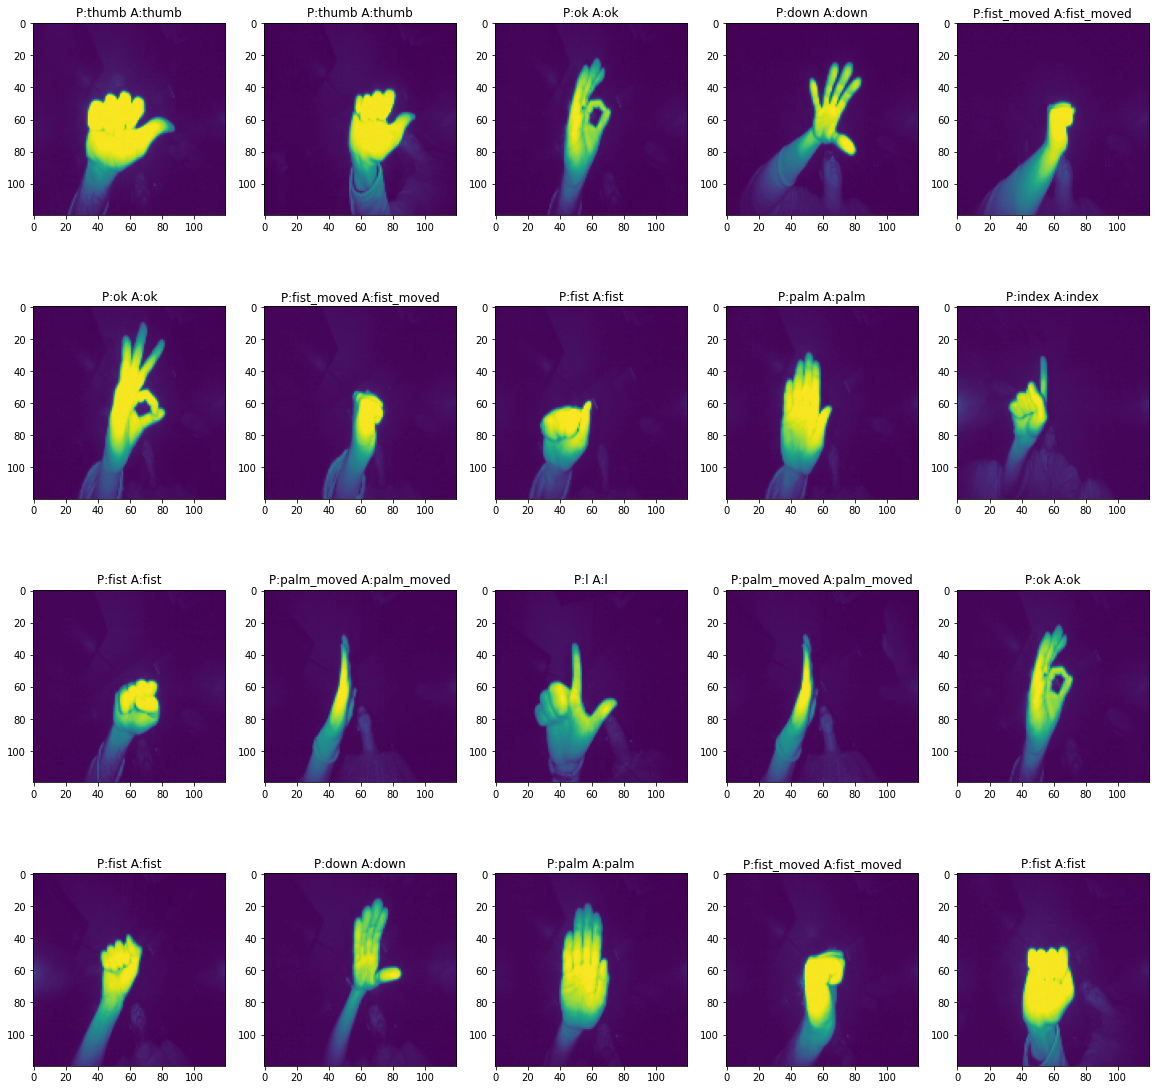

In [ ]:
n_rows=4
n_cols=5
plt.figure(figsize=(20,20))
for row in range(n_rows):
  for col in range(n_cols):
    classes=["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"]
    index=n_cols*row+col
    plt.subplot(n_rows,n_cols,index+1)

    plt.imshow(xcopy_test[index])
    predict=predictions[index]
    pre_label=np.argmax(predict)
    
    plt.title('P:{} A:{}'.format(classes[pre_label],labels[index]))
plt.show()